In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [6]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Luckman Khan\Downloads\Potato_blight\PlantVillage\train',
    shuffle=True,
    image_size =(256,256),
    batch_size = 32
)
len(train_data)

Found 1721 files belonging to 3 classes.


54

In [7]:
image_size = 256
batch_size = 32

In [8]:
class_names = train_data.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

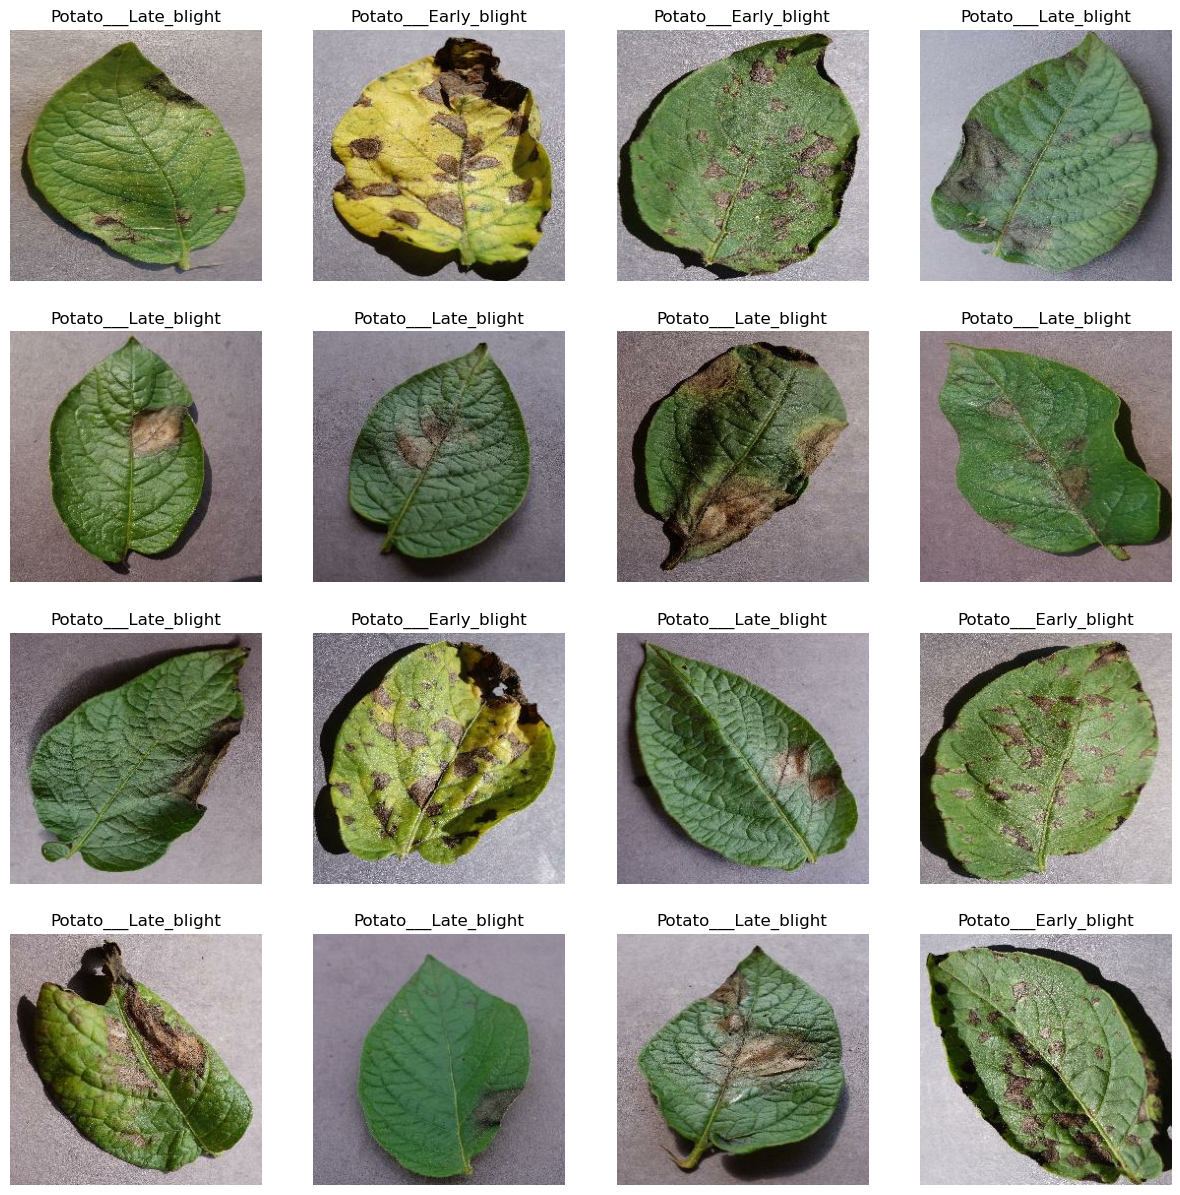

In [9]:
plt.figure(figsize=(15,15))
for image,label in train_data:
    batch = image.shape[0]
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label[i]])

In [10]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Luckman Khan\Downloads\Potato_blight\PlantVillage\val',
    shuffle=True,
    image_size =(256,256),
    batch_size = 32
)


Found 431 files belonging to 3 classes.


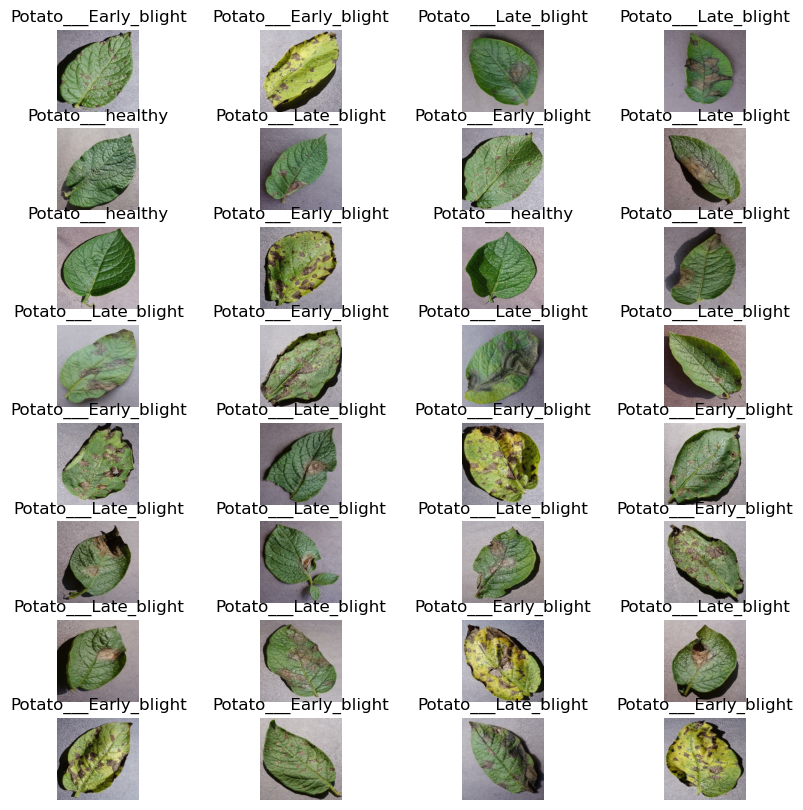

In [11]:
plt.figure(figsize=(10,10))
for image,label in test_data:
    batch = image.shape[0]
    for i in range(batch):
        plt.subplot(8,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label[i]])

In [12]:
test_ds = test_data.take(7)
val_ds =test_data.skip(7)

In [13]:
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)])

In [16]:

input_shape = (256, 256,3)
n_classes = 3   

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.summary()


C:\Users\Luckman Khan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [18]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 553ms/step - accuracy: 0.6421 - loss: 0.7790 - val_accuracy: 0.7681 - val_loss: 0.5563
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 530ms/step - accuracy: 0.7960 - loss: 0.4934 - val_accuracy: 0.7971 - val_loss: 0.4717
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 539ms/step - accuracy: 0.8739 - loss: 0.3146 - val_accuracy: 0.8744 - val_loss: 0.3225
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 542ms/step - accuracy: 0.9018 - loss: 0.2543 - val_accuracy: 0.9034 - val_loss: 0.2435
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 540ms/step - accuracy: 0.9064 - loss: 0.2394 - val_accuracy: 0.9614 - val_loss: 0.1432
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 530ms/step - accuracy: 0.9152 - loss: 0.2194 - val_accuracy: 0.8019 - val_loss: 0.4078
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 548ms/step - accuracy: 0.9268 - loss: 0.1852 - val_accuracy: 0.9662 - val_loss: 0.1249
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 535ms/step - accuracy: 0.9553 - loss: 0.1187 - val_accu

In [26]:
scores = model.evaluate(test_ds)
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 1.0000 - loss: 0.0051    


Text(0.5, 1.0, 'Training and validation loss')

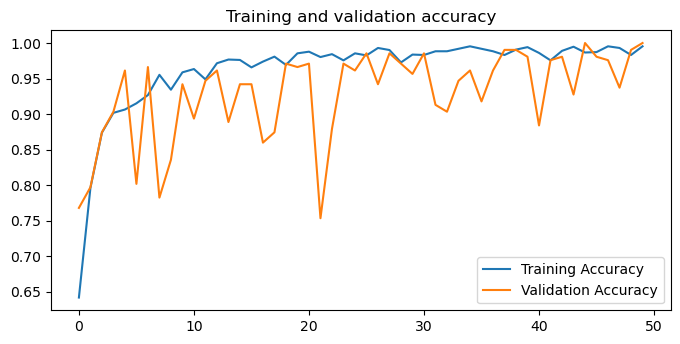

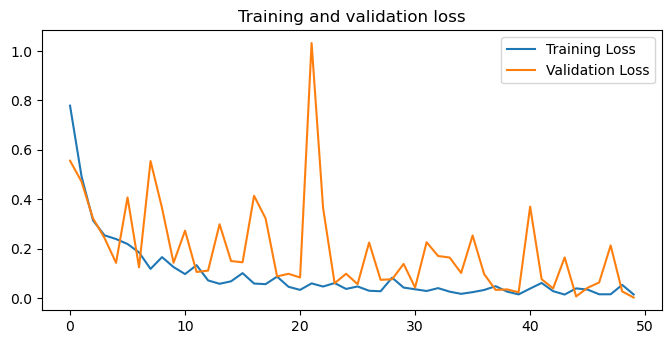

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(range(50),acc,label='Training Accuracy')
plt.plot(range(50),val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Training and validation accuracy')

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
plt.plot(range(50),loss,label='Training Loss')
plt.plot(range(50),val_loss,label='Validation Loss')
plt.legend()
plt.title('Training and validation loss')

In [37]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)

    predictions = model(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence
    

NameError: name 'confidencec' is not defined

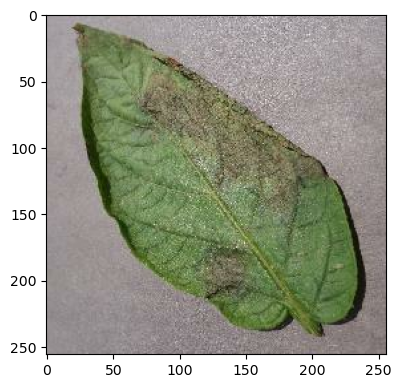

In [38]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax =  plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\nPredicted: (predicted_class)\nConfidence:{confidencec}")
        plt.axis('off')